In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-classification-data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df= pd.read_csv(path + '/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
df[df["person_age"] > 100]["person_age"].value_counts()

,count
person_age,
144.0,3
123.0,2
116.0,1
109.0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36000, 13), (9000, 13), (36000,), (9000,))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
X.shape

(45000, 13)

In [ ]:
X.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000


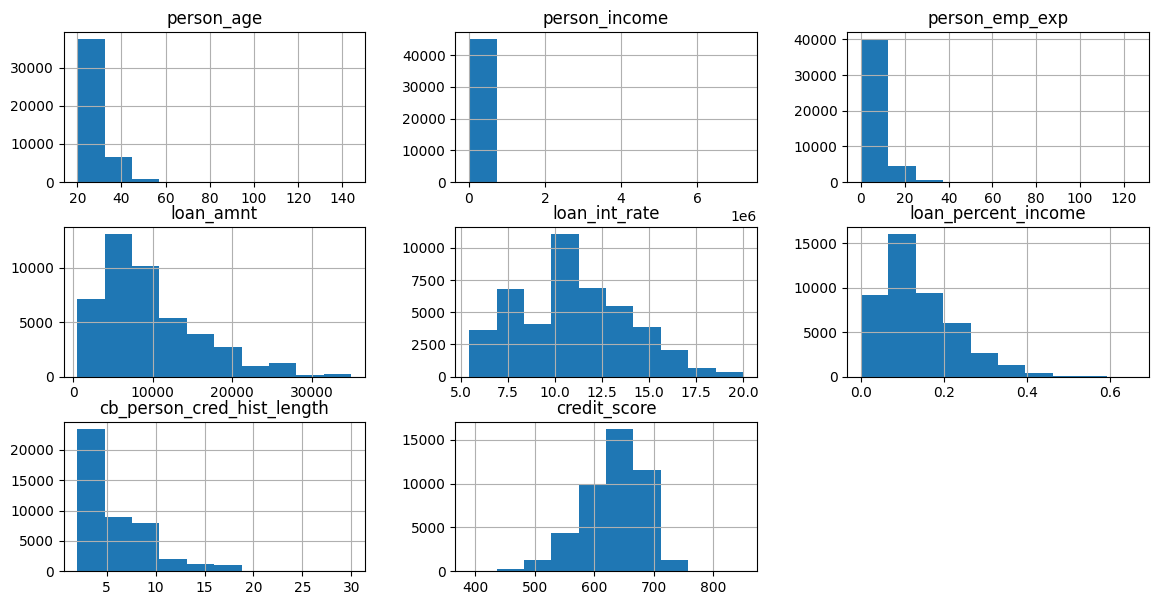

In [ ]:
X.hist(figsize = (14, 7))
plt.show()

In [ ]:
df[df["person_age"] == 144]


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0


In [ ]:
y[81]

0

In [ ]:
df[df["person_age"] == 123]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0


In [ ]:
y[747]

0

In [ ]:
df[df["person_age"] == 116]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.0,24.0,708,No,0


In [ ]:
y[37930]

0

In [ ]:
df[df["person_age"] == 109]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.0,22.0,792,No,0


In [ ]:
y[38113]

0

In [ ]:
X_num = X_train.select_dtypes(include = np.number)
X_cat = X_train.select_dtypes(include = 'object')
X_num

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
9373,26.0,81590.0,2,8000.0,7.14,0.10,2.0,634
27453,34.0,169083.0,13,4000.0,7.88,0.02,7.0,675
15640,24.0,109188.0,1,15000.0,17.27,0.14,4.0,654
6946,23.0,108928.0,0,6000.0,10.25,0.06,3.0,681
19948,33.0,80182.0,9,10600.0,12.99,0.13,7.0,670
...,...,...,...,...,...,...,...,...
29989,36.0,45565.0,16,3000.0,18.39,0.07,15.0,636
4848,23.0,51358.0,2,5750.0,13.57,0.11,3.0,581
14879,21.0,142630.0,2,14000.0,7.88,0.10,3.0,598
36680,24.0,144886.0,0,20000.0,8.99,0.14,4.0,565


In [ ]:
X_num_cols = X_train.select_dtypes(include = np.number).columns

In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.base import BaseEstimator, TransformerMixin





# class ReplaceOutliersWithMedian(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold=100):
#         self.threshold = threshold
#         self.median = None

#     def fit(self, X, y=None):
#         # Calculate the median for the person_age column
#         self.median = np.median(X)
#         return self

#     def transform(self, X):
#         # Replace outliers (values > threshold) with the median
#         X = np.where(X > self.threshold, self.median, X)
#         return X.reshape(-1, 1)






def log_transform(X):
    return np.log(X+1)

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(log_transform)
)



X_cat_for_binary = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    BinaryEncoder()
)

X_cat_for_onehot = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

X_cat_for_ordinal = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder()
)



X_num_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
    StandardScaler()
)


person_age_outlier_pipeline = make_pipeline(
    ReplaceOutliersWithMedian(threshold=100),
    StandardScaler()
)



transformer = ColumnTransformer([
    ('num', X_num_pipeline, X_num_cols),
    ('binary', X_cat_for_binary, ['person_gender','previous_loan_defaults_on_file']),
    ('ordinal',X_cat_for_ordinal,['person_education']),
    ('onehot', X_cat_for_onehot, ['person_home_ownership', 'loan_intent']),
   # ('outlier_age', person_age_outlier_pipeline, ['person_age']),
    ('log', log_pipeline, ['loan_int_rate','loan_amnt','loan_percent_income','person_age'])
])



X_train_prepared = transformer.fit_transform(X_train)
X_test_prepared = transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [ ]:
X_num_cols

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
full_pipeline = make_pipeline(transformer, RandomForestClassifier(class_weight = {0:4, 1:0.6}))
full_pipeline.fit(X_train, y_train)
full_pipeline.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


0.9257777777777778

In [ ]:
from sklearn.tree import DecisionTreeClassifier
full_pipeline = make_pipeline(transformer, DecisionTreeClassifier())
full_pipeline.fit(X_train, y_train)
full_pipeline.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


0.9003333333333333

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = make_pipeline(transformer, SGDClassifier())
full_pipeline.fit(X_train, y_train)
full_pipeline.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


0.9007777777777778

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = 'accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. 

array([0.89641667, 0.89516667, 0.89791667])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. 

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[25812,  2271],
       [ 1445,  6472]])

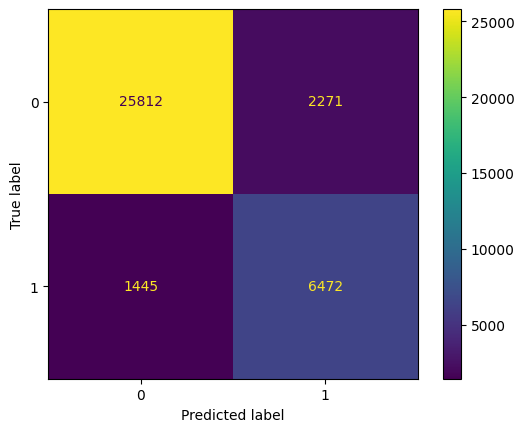

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
#resampling oversampling the minority class or undersampling the majority class to balance the dataset.  Oversampling S.M.O.T.E,
#Class weight Assigning different weights to different classes during model training can help address class imbalance. By assigning higher weights to the minority class, the model is encouraged to pay more attention to it.
#Data Augmentation
#Data augmentation techniques can be used to
#artificially increase the size of the minority class by creating new synthetic samples. This can be done by applying transformations like rotation, scaling, or adding noise to existing samples.
#Ensemble Methods


# class weight yoxla
# resempling ele cox olan datani sil
# smote yoxla